In [1]:
# this walk-through was adapted from the following two tutorials, check them out for more info:
# https://machinelearningmastery.com/machine-learning-in-python-step-by-step/
# https://towardsdatascience.com/exploring-classifiers-with-python-scikit-learn-iris-dataset-2bcb490d2e1b


import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

In [2]:
# games = pd.read_csv("data/root_games.csv")
games = pd.concat([pd.read_csv("data/root_games.csv"), pd.read_csv("data/tail_games1.csv"),
                   pd.read_csv("data/tail_games2.csv"), pd.read_csv("data/tail_games3.csv"),
                   pd.read_csv("data/tail_games4.csv")], axis=0, ignore_index=True)

/tmp/ipykernel_2470687/971427542.py:2: DtypeWarning: Columns (79,80,81,82,197,198,199,200,315,316,317,318,433,434,435,436,551,552,553,554,669,670,671,672,787,788,789,790,905,906,907,908,1023,1024,1025,1026,1141,1142,1143,1144) have mixed types. Specify dtype option on import or set low_memory=False.
  games = pd.concat([pd.read_csv("data/root_games.csv"), pd.read_csv("data/tail_games1.csv"),
/tmp/ipykernel_2470687/971427542.py:2: DtypeWarning: Columns (79,80,202,203,319,320,436,437,553,554,676,677,799,800,916,917,1039,1040,1156,1157) have mixed types. Specify dtype option on import or set low_memory=False.
  games = pd.concat([pd.read_csv("data/root_games.csv"), pd.read_csv("data/tail_games1.csv"),
/tmp/ipykernel_2470687/971427542.py:3: DtypeWarning: Columns (79,80,196,197,313,314,430,431,547,548,664,665,781,782,898,899,1015,1016,1132,1133) have mixed types. Specify dtype option on import or set low_memory=False.
  pd.read_csv("data/tail_games2.csv"), pd.read_csv("data/tail_games3.csv"

In [3]:
games.head()

,gameId,platformId,gameCreation,gameDuration,queueId,mapId,seasonId,gameVersion,gameMode,gameType,...,participant7.timeline.damageTakenDiffPerMinDeltas.30-end,participant8.timeline.csDiffPerMinDeltas.30-end,participant8.timeline.xpDiffPerMinDeltas.30-end,participant8.timeline.damageTakenDiffPerMinDeltas.30-end,participant9.timeline.csDiffPerMinDeltas.30-end,participant9.timeline.xpDiffPerMinDeltas.30-end,participant9.timeline.damageTakenDiffPerMinDeltas.30-end,participant10.timeline.csDiffPerMinDeltas.30-end,participant10.timeline.xpDiffPerMinDeltas.30-end,participant10.timeline.damageTakenDiffPerMinDeltas.30-end
0,3697668302,NA1,1607466298025,607,420,11,13,10.24.345.8390,CLASSIC,MATCHED_GAME,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3684169604,NA1,1606615244343,1485,420,11,13,10.24.345.8390,CLASSIC,MATCHED_GAME,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3683991059,NA1,1606603135732,1506,420,11,13,10.24.345.8390,CLASSIC,MATCHED_GAME,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3674176170,NA1,1606011059740,1948,420,11,13,10.23.343.2581,CLASSIC,MATCHED_GAME,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3670897053,NA1,1605828202468,1854,420,11,13,10.23.343.2581,CLASSIC,MATCHED_GAME,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
games.value_counts()

gameId      platformId  gameCreation   gameDuration  queueId  mapId  seasonId  gameVersion     gameMode  gameType      banned1.championId  banned2.championId  banned3.championId  banned4.championId  banned5.championId  banned6.championId  banned7.championId  banned8.championId  banned9.championId  banned10.championId  participant1.teamId  participant1.championId  participant1.spell1Id  participant1.spell2Id  participant1.stats.participantId  participant1.stats.win  participant1.stats.item0  participant1.stats.item1  participant1.stats.item2  participant1.stats.item3  participant1.stats.item4  participant1.stats.item5  participant1.stats.item6  participant1.stats.kills  participant1.stats.deaths  participant1.stats.assists  participant1.stats.largestKillingSpree  participant1.stats.largestMultiKill  participant1.stats.killingSprees  participant1.stats.longestTimeSpentLiving  participant1.stats.doubleKills  participant1.stats.tripleKills  participant1.stats.quadraKills  participant1.stat

In [5]:
# wanted_data = ["participant1.stats.win",
#     "participant1.championId", "participant1.spell1Id",
#                 "participant1.spell2Id", #"participant1.timeline.lane",
#                 "participant1.timeline.xpDiffPerMinDeltas.0-10", 
#                 "participant1.timeline.goldPerMinDeltas.0-10",
#                "participant2.championId", "participant2.spell1Id",
#                 "participant2.spell2Id", #"participant2.timeline.lane",
#                 "participant2.timeline.xpDiffPerMinDeltas.0-10", 
#                 "participant2.timeline.goldPerMinDeltas.0-10",
#                "participant3.championId", "participant3.spell1Id",
#                 "participant3.spell2Id", #"participant3.timeline.lane",
#                 "participant3.timeline.xpDiffPerMinDeltas.0-10", 
#                 "participant3.timeline.goldPerMinDeltas.0-10",
#                "participant4.championId", "participant4.spell1Id",
#                 "participant4.spell2Id", #"participant4.timeline.lane",
#                 "participant4.timeline.xpDiffPerMinDeltas.0-10", 
#                 "participant4.timeline.goldPerMinDeltas.0-10",
#                "participant5.championId", "participant5.spell1Id",
#                 "participant5.spell2Id", #"participant5.timeline.lane",
#                 "participant5.timeline.xpDiffPerMinDeltas.0-10", 
#                 "participant5.timeline.goldPerMinDeltas.0-10",
#                "participant6.championId", "participant6.spell1Id",
#                 "participant6.spell2Id", #"participant6.timeline.lane",
#                 "participant6.timeline.xpDiffPerMinDeltas.0-10", 
#                 "participant6.timeline.goldPerMinDeltas.0-10",
#                "participant7.championId", "participant7.spell1Id",
#                 "participant7.spell2Id", #"participant7.timeline.lane",
#                 "participant7.timeline.xpDiffPerMinDeltas.0-10", 
#                 "participant7.timeline.goldPerMinDeltas.0-10",
#                "participant8.championId", "participant8.spell1Id",
#                 "participant8.spell2Id", #"participant8.timeline.lane",
#                 "participant8.timeline.xpDiffPerMinDeltas.0-10", 
#                 "participant8.timeline.goldPerMinDeltas.0-10",
#                "participant9.championId", "participant9.spell1Id",
#                 "participant9.spell2Id", #"participant9.timeline.lane",
#                 "participant9.timeline.xpDiffPerMinDeltas.0-10", 
#                 "participant9.timeline.goldPerMinDeltas.0-10",
#                "participant10.championId", "participant10.spell1Id",
#                 "participant10.spell2Id", #"participant10.timeline.lane",
#                 "participant10.timeline.xpDiffPerMinDeltas.0-10", 
#                 "participant10.timeline.goldPerMinDeltas.0-10"
#                 ]

In [5]:
def createWantedData():
    ## Section for Participant
    # Don't change prefix
    prefix = "participant"

    # Do change endings
    endings = [".championId", ".spell1Id",
                ".spell2Id", #".timeline.lane",
                ".timeline.xpDiffPerMinDeltas.0-10", 
                ".timeline.goldPerMinDeltas.0-10"]
    
    # Return array
    ret = []

    #Append to return array
    for ending in endings:
        for i in range(10):
            ret.append(prefix + str(i + 1) + ending)

    ## Section for Team data
    team_prefix = "teamId_"
    team_endings = [".firstBlood", ".firstRiftHerald"]

    for team_ending in team_endings:
        for i in range(2):
            ret.append(team_prefix + str(i + 1) + "00" + team_ending)
    
    ret.append(team_prefix + "100.win")

    return ret

#Show creation
print(createWantedData())

['participant1.championId', 'participant2.championId', 'participant3.championId', 'participant4.championId', 'participant5.championId', 'participant6.championId', 'participant7.championId', 'participant8.championId', 'participant9.championId', 'participant10.championId', 'participant1.spell1Id', 'participant2.spell1Id', 'participant3.spell1Id', 'participant4.spell1Id', 'participant5.spell1Id', 'participant6.spell1Id', 'participant7.spell1Id', 'participant8.spell1Id', 'participant9.spell1Id', 'participant10.spell1Id', 'participant1.spell2Id', 'participant2.spell2Id', 'participant3.spell2Id', 'participant4.spell2Id', 'participant5.spell2Id', 'participant6.spell2Id', 'participant7.spell2Id', 'participant8.spell2Id', 'participant9.spell2Id', 'participant10.spell2Id', 'participant1.timeline.xpDiffPerMinDeltas.0-10', 'participant2.timeline.xpDiffPerMinDeltas.0-10', 'participant3.timeline.xpDiffPerMinDeltas.0-10', 'participant4.timeline.xpDiffPerMinDeltas.0-10', 'participant5.timeline.xpDiffP

In [47]:
games['teamId_100.firstRiftHerald'].value_counts()

True     9423
False    8078
Name: teamId_100.firstRiftHerald, dtype: int64

In [48]:
df_game = games[createWantedData()]

In [49]:
df_game = df_game.fillna(0)

In [9]:
df_game.head()

,participant1.championId,participant2.championId,participant3.championId,participant4.championId,participant5.championId,participant6.championId,participant7.championId,participant8.championId,participant9.championId,participant10.championId,...,participant6.timeline.goldPerMinDeltas.0-10,participant7.timeline.goldPerMinDeltas.0-10,participant8.timeline.goldPerMinDeltas.0-10,participant9.timeline.goldPerMinDeltas.0-10,participant10.timeline.goldPerMinDeltas.0-10,teamId_100.firstBlood,teamId_200.firstBlood,teamId_100.firstRiftHerald,teamId_200.firstRiftHerald,teamId_100.win
0,79,147,202,10,555,84,57,246,145,121,...,366.7,239.7,100.0,100.0,222.9,False,True,False,False,Win
1,202,121,4,267,8,266,145,236,28,12,...,269.5,331.8,225.5,425.7,180.5,True,False,True,False,Win
2,412,114,145,3,64,516,777,89,20,67,...,293.7,300.3,184.0,264.1,303.3,True,False,False,True,Win
3,246,126,134,81,101,84,412,62,2,112,...,259.6,178.7,217.8,271.5,284.7,True,False,False,False,Fail
4,163,62,80,30,238,134,20,202,24,267,...,284.0,371.3,333.1,310.1,232.9,False,True,True,False,Fail


In [65]:
# df_game.to_csv("data/processed_games.csv")

In [51]:
#divide into training and testing
train, test = train_test_split(df_game, test_size = .2, stratify = df_game['teamId_100.win'], random_state = 0)


In [52]:
train.value_counts()

participant1.championId  participant2.championId  participant3.championId  participant4.championId  participant5.championId  participant6.championId  participant7.championId  participant8.championId  participant9.championId  participant10.championId  participant1.spell1Id  participant2.spell1Id  participant3.spell1Id  participant4.spell1Id  participant5.spell1Id  participant6.spell1Id  participant7.spell1Id  participant8.spell1Id  participant9.spell1Id  participant10.spell1Id  participant1.spell2Id  participant2.spell2Id  participant3.spell2Id  participant4.spell2Id  participant5.spell2Id  participant6.spell2Id  participant7.spell2Id  participant8.spell2Id  participant9.spell2Id  participant10.spell2Id  participant1.timeline.xpDiffPerMinDeltas.0-10  participant2.timeline.xpDiffPerMinDeltas.0-10  participant3.timeline.xpDiffPerMinDeltas.0-10  participant4.timeline.xpDiffPerMinDeltas.0-10  participant5.timeline.xpDiffPerMinDeltas.0-10  participant6.timeline.xpDiffPerMinDeltas.0-10  parti

In [63]:
def test_model(model, xtr, ytr, xtst, ytst):
    model.fit(xtr, ytr)
    y_pred = model.predict(xtst)
    print("accuracy:", metrics.accuracy_score(y_pred, ytst))

In [13]:
#divide into x and y
x_train = train.drop(['teamId_100.win'], axis=1)#fill in with the columns you want to predict
y_train = train['teamId_100.win']

x_test = test.drop('teamId_100.win', axis=1)# fill in with the same columns as x_train
y_test = test['teamId_100.win']

In [14]:
test_model(
    LogisticRegression(solver='liblinear', multi_class='ovr'),
    x_train, y_train, x_test, y_test
)

accuracy: 0.7312196515281348


In [15]:
#divide into x and y
x_train = train[['teamId_100.firstBlood', 'teamId_100.firstRiftHerald']]#fill in with the columns you want to predict
y_train = train['teamId_100.win']

x_test = test[['teamId_100.firstBlood', 'teamId_100.firstRiftHerald']]# fill in with the same columns as x_train
y_test = test['teamId_100.win']

In [16]:
test_model(
    LogisticRegression(solver='liblinear', multi_class='ovr'),
    x_train, y_train, x_test, y_test
)

accuracy: 0.6312482147957726


In [17]:
#divide into x and y
x_train = train.drop('teamId_100.win', axis=1).drop('teamId_200.firstBlood', axis=1) #fill in with the columns you want to predict
y_train = train['teamId_100.win']

x_test = test.drop('teamId_100.win', axis=1).drop('teamId_200.firstBlood', axis=1) # fill in with the same columns as x_train
y_test = test['teamId_100.win']

In [18]:
test_model(
    LogisticRegression(solver='liblinear', multi_class='ovr'),
    x_train, y_train, x_test, y_test
)

accuracy: 0.7306483861753784


In [19]:
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

In [20]:
test_model(
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1, random_state=39),
    x_train, y_train, x_test, y_test
)

accuracy: 0.6846615252784919


In [21]:
test_model(
    KNeighborsClassifier(1000),
    x_train, y_train, x_test, y_test
)

accuracy:  0.6312482147957726


In [22]:
test_model(
    GaussianNB(),
    x_train, y_train, x_test, y_test
)

accuracy: 0.7169380177092259


In [23]:
test_model(
    QuadraticDiscriminantAnalysis(),
    x_train, y_train, x_test, y_test
)

accuracy: 0.5921165381319623


/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


In [24]:
test_model(
    AdaBoostClassifier(random_state=39),
    x_train, y_train, x_test, y_test
)

accuracy: 0.7163667523564696


In [25]:
model_names = [
    'Logistic Regression',
    'Random Forest',
    'K Neighbors',
    'Naive Bayes',
    'QDA',
    'Ada Boost',
]

accuracies = [
    0.7306483861753784,
    0.6846615252784919,
    0.6312482147957726,
    0.7169380177092259,
    0.5921165381319623,
    0.7163667523564696,
]

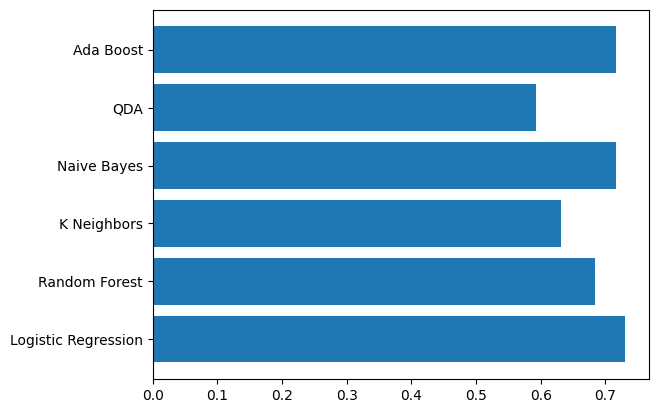

In [27]:
plt.barh(model_names, accuracies)
plt.show()